In [ ]:
!pip install pandas matplotlib seaborn wordcloud
!pip install --upgrade pip
!pip install koreanize-matplotlib
!pip install plotly

1. stopword 얘기 해봐야할 듯 하다
2.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 사용자 폰트 경로
user_font_path = "/content/drive/MyDrive/25-1/공모전/a고딕16.ttf"

# 시스템 폰트 경로로 복사
shutil.copy(user_font_path, "/usr/share/fonts/truetype/a고딕16.ttf")

# matplotlib이 인식하도록 FontProperties 객체로 직접 등록
font_prop = fm.FontProperties(fname="/usr/share/fonts/truetype/a고딕16.ttf")

# 폰트 이름 확인
font_name = font_prop.get_name()
print("📌 실제 인식된 폰트 이름:", font_name)

# 전역 설정에 반영
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False


📌 실제 인식된 폰트 이름: KoreanGD16R


In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기
comments_df = pd.read_csv('/content/drive/MyDrive/25-1/공모전/comment_tag.csv')  # 실제 업로드한 이름 확인 필요
posts_df = pd.read_csv('/content/drive/MyDrive/25-1/공모전/posts_tag.csv')

In [ ]:
comments_df.info()
comments_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36948 entries, 0 to 36947
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  36948 non-null  int64 
 1   post_id     36948 non-null  int64 
 2   작성자         36923 non-null  object
 3   직무/경력       34245 non-null  object
 4   레벨          36948 non-null  object
 5   답변          36659 non-null  object
 6   작성일         36948 non-null  object
 7   댓글수         36948 non-null  int64 
 8   좋아요수        36948 non-null  int64 
 9   직무          34245 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.8+ MB


,comment_id,post_id,작성자,직무/경력,레벨,답변,작성일,댓글수,좋아요수,직무
0,1,6,mentor7229800,NaN,Lv 5,"중고/NNG,신입/NNG,직/NNG,계획/NNG,라면/NNG,개인/NNG,팀/NNG...",20시간 전 작성,0,0,NaN
1,2,8,mentor7229800,NaN,Lv 5,"건강/NNG,문제/NNG,직무/NNG,스트레스/NNG,고려/NNG,식품/NNG,업계...",20시간 전 작성,0,0,NaN


In [ ]:
posts_df.info()
posts_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   post_id  10836 non-null  float64       
 1   제목       10796 non-null  object        
 2   내용       7607 non-null   object        
 3   태그       10448 non-null  object        
 4   작성일      10835 non-null  datetime64[ns]
 5   해시태그     3630 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 508.3+ KB


,post_id,제목,내용,태그,작성일,해시태그
0,1.0,"경리/NNG,전망/NNG,기획/NNG,커리어/NNP,도움/NNG","대학/NNG,졸업/NNG,늦깎이/NNG,사업/NNG,기획/NNG,년차/NNG,직/N...",경리,2025-05-01,"경리/NNG,중소기업/NNG,공공/NNG,기관/NNG,계약직/NNG,직/NNG"
1,2.0,"물류/NNP,관련/NNG,려고/NNG,대/NNG,노/NNP,베이스/NNG,가능/NNG","경기/NNG,남부/NNG,거주/NNG,잡/NNG,전문대/NNG,물류/NNP,경영학/...",물류관리자,2025-05-01,NaN


In [ ]:
import plotly.express as px
import pandas as pd
import re
from collections import Counter

# 한글 명사 추출 함수
def extract_nouns(text_series):
    words = []
    for line in text_series.dropna():
        tokens = line.split(',')
        nouns = [re.sub(r'/[A-Z]+', '', token) for token in tokens if '/NNG' in token or '/NNP' in token]
        words.extend(nouns)
    return words

# 댓글에서 키워드 상위 20개 추출
comment_words = extract_nouns(comments_df['답변'])
top_comment = Counter(comment_words).most_common(20)
df_comment = pd.DataFrame(top_comment, columns=['단어', '빈도수'])

# Plotly 시각화 - 고급 템플릿
fig = px.bar(
    df_comment,
    x='빈도수',
    y='단어',
    orientation='h',
    title='<b>댓글에서 가장 많이 언급된 키워드 TOP 20</b>',
    color='빈도수',
    color_continuous_scale='agsunset',
    template='plotly_white'
)

# 고급 레이아웃 설정
fig.update_layout(
    yaxis=dict(autorange='reversed', title=''),
    xaxis=dict(title='언급 빈도', showgrid=True, gridcolor='lightgray'),
    font=dict(family=font_name, size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=100, r=40, t=70, b=50),
    height=600
)

fig.show()


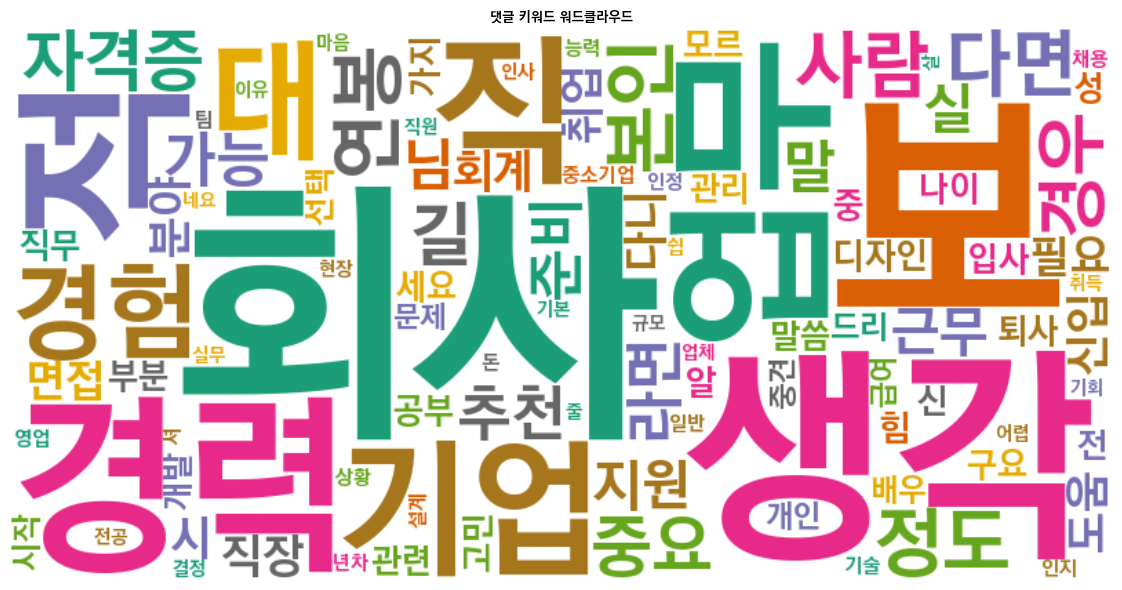

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 속성 객체 (title에도 적용 가능)
font_path = "/usr/share/fonts/truetype/a고딕16.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 키워드 100개 추출
top_comment = Counter(comment_words).most_common(100)
word_freq = dict(top_comment)

# 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    colormap='Dark2'
).generate_from_frequencies(word_freq)


# 방법 1: 전역 설정
plt.rcParams['font.family'] = 'KoreanGD16R'


# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("댓글 키워드 워드클라우드", fontsize=20, fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re
from collections import Counter
import plotly.graph_objects as go

# 직무만 추출
comments_df['직무'] = comments_df['직무/경력'].dropna().apply(lambda x: x.split('/')[0] if '/' in x else x)

# 상위 10개 직무 추출
top_jobs = comments_df['직무'].value_counts().head(10).index.tolist()

# 명사 추출 함수
def extract_nouns(text_series):
    words = []
    for line in text_series.dropna():
        tokens = line.split(',')
        nouns = [re.sub(r'/[A-Z]+', '', token) for token in tokens if '/NNG' in token or '/NNP' in token]
        words.extend(nouns)
    return words

# 직무별 키워드 추출
job_keyword_freq = {}

for job in top_jobs:
    job_comments = comments_df[comments_df['직무'] == job]['답변']
    keywords = extract_nouns(job_comments)
    common = Counter(keywords).most_common(10)
    job_keyword_freq[job] = dict(common)

# 데이터프레임 변환
df_keywords = pd.DataFrame(job_keyword_freq).fillna(0).astype(int)

# 히트맵 시각화
fig = go.Figure(data=go.Heatmap(
    z=df_keywords.values,
    x=df_keywords.columns,
    y=df_keywords.index,
    colorscale='YlGnBu',
    hoverongaps=False,
    colorbar=dict(title='빈도수')
))

fig.update_layout(
    title='<b>직무별 키워드 빈도 히트맵 (상위 10개 직무)</b>',
    xaxis_title='직무',
    yaxis_title='키워드',
    font=dict(size=14),
    margin=dict(l=100, r=40, t=80, b=50),
    height=700,
    template='plotly_white'
)

fig.show()


tf-idf


# 1. 직무별 긍정/부정 분위기 분석
목표: 댓글 내용을 바탕으로 직무별 감정 경향 분석

감성 점수 분포 (히스토그램)

직무별 평균 감성 점수 (막대그래프)

transformers?


# 2. 직무별 이직 고민 빈도
목적: 어떤 직무군에서 이직 고민이 많이 발생하는지 파악

posts_df["태그"] or 직무/경력에서 직무 count

# 3.이직 고민 게시글에 달린 평균 댓글 수 / 좋아요 수
목적: 사람들이 이직 고민에 얼마나 공감하고 피드백을 주는지 측정

방법: 이직 키워드 포함된 게시글만 필터링 (내용, 제목 기준) → 연결된 comments_df에서 통계

# 4. 이직 관련 키워드별 (ex. 연봉, 워라밸, 상사, 야근 등) 댓글 반응 분석
목적: 이직 이유 중 어떤 요소가 가장 큰 불만/고민인지 텍스트 기반으로 파악

방법: posts_df["내용"]에서 키워드별 빈도 분석 → 댓글 반응과 매핑

# 5. 직무 간 전환 흐름 분석 (ex. 교육 → 마케팅)
목적: 이직 시 어떤 직무로 옮기려는지 직무 간 흐름 파악

방법: 직무/경력에서 현재 직무, 내용 또는 태그에서 희망 직무 추정

# 6. 이직 고민 글에 Lv5 멘토가 얼마나 참여했는가?
목적: 고민의 무게에 대해 얼마나 전문가들이 개입하고 있는지

방법: 레벨 == "Lv 5" 필터 → 댓글 수 / post_id 매핑

# 7. 이직 관련 게시글의 좋아요수 상위 Top N 주제 분석
목적: 사람들이 가장 공감하는 이직 관련 주제 파악

방법: posts_df["내용"], 좋아요수 기준 상위 랭킹 후 워드클라우드

# 8. 작성자(멘토)별 이직 고민 분야 전문성 분석
목적: 어떤 멘토가 어떤 직무 이직 고민에 많이 응답했는지 확인 → 향후 추천 기능에 활용 가능

방법: 작성자, 직무, post_id join 후 pivot

# 9. 연도/월별 이직 관련 게시글 및 댓글 추이
목적: 코로나, 경기침체 등 외부 환경에 따라 이직 고민이 늘었는가?

방법: 작성일 기준 시계열 분석 (연도/월 기준 groupby)

# 10. 게시글 태그 or 해시태그 기반 이직 주제 군집화
목적: 이직 고민 유형을 분류하고, 사람들의 주요 관심사를 주제별로 나누기

방법: TF-IDF + 차원축소(PCA/TSNE) + KMeans 클러스터링

# 11. 멘토들의 이직 관련 댓글 중 '공감' 많은 내용 워드클라우드
목적: 멘토들이 어떤 조언을 주로 하고 있는지, 그 중 많이 공감받는 표현이 무엇인지 시각화

방법: 답변 텍스트 중 좋아요수 높은 것만 추출 후 워드클라우드 생성